In [21]:
import numpy as np
import matplotlib.pyplot as plt


# 设置初始参数
Nx = 256
xmin = 0
xmax = 40
M = np.zeros((Nx, Nx), dtype=complex)  # 使用复数矩阵以处理负值平方根

dx = (xmax - xmin) / Nx
dx2 = dx * dx
x = np.linspace(xmin + dx, dx, xmax)  # 修改 x 的生成方式，确保和 MATLAB 一致
na = 41
nss = 21
amin = 0.0
amax = 4.0
smin = 0.0
smax = 2.0

aa = np.linspace(amin, amax, na)
ss = np.linspace(smin, smax, nss)
AA, SS = np.meshgrid(aa, ss)
WW = np.zeros_like(AA, dtype=complex)

# 遍历 alpha 和 s
for ia in range(na):
    for iss in range(nss):
        a = aa[ia]
        s = ss[iss]  # 设置 alpha 和 s 参数
        
        # 计算 p, q, r
        p = 2.0 * (s * x - a * np.sin(x)) * (s - a * np.cos(x))
        q = a * (np.cos(x) + (s * x - a * np.sin(x)) * np.sin(x))
        r = -(1.0 + (s * x - a * np.sin(x))**2)
        
        # 填充矩阵 M 的第一行
        M[0, 0] = 1.0 / dx2 - p[0] / (2.0 * dx * r[0]) + q[0] / r[0]
        
        # 填充矩阵 M 的剩余行
        for j in range(1, Nx):
            M[j, j] = 2.0 / dx2 + q[j] / r[j]
            M[j - 1, j] = -1.0 / dx2 + p[j - 1] / (2.0 * dx * r[j - 1])
            M[j, j - 1] = -1.0 / dx2 - p[j] / (2.0 * dx * r[j])
        
        # 计算特征值和特征向量
        D, V = np.linalg.eig(M)
        w2 = np.diag(D)  # 提取特征值

        # 计算 omega (w) 和 gamma_max
        w = np.sqrt(np.abs(w2)) * np.sign(np.real(w2))  # 确保特征值处理为复数

        gammamax = np.max(np.imag(w))
        ind = np.where(np.imag(w) == gammamax)[0]
        omega = w[ind[0]][0]  # 压缩 omega 以确保其为标量
        
        # 将单一复数值 omega 存储到 WW 中
        WW[iss, ia] = omega

# 绘制3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(AA, SS, np.imag(WW), cmap='viridis')
ax.set_xlabel('alpha')
ax.set_ylabel('s')
ax.set_zlabel('gamma_MHD/omega_A')
ax.set_title('Stable domain in s-alpha space')
plt.savefig('stable_domain.png')

# 绘制2D图
row = int(0.8 / smax * (nss - 1)) + 1
plt.figure()
plt.plot(AA[row, :], np.imag(WW[row, :]))
plt.xlabel('alpha')
plt.ylabel('gamma_MHD/omega_A')
plt.title(f's={SS[row, 0]}')
plt.savefig(f's_alpha_plot_row_{row}.png')
plt.show()

# 绘制二维图
plt.figure()
plt.contourf(AA, SS, np.imag(WW), levels=50, cmap='viridis')
plt.colorbar(label='gamma_MHD/omega_A')
plt.xlabel('alpha')
plt.ylabel('s')
plt.title('Contour plot of gamma_MHD/omega_A in s-alpha space')
plt.savefig('contour_plot.png')
plt.show()

# 保存数据
np.save('WW.npy', WW)


IndexError: index 40 is out of bounds for axis 0 with size 40

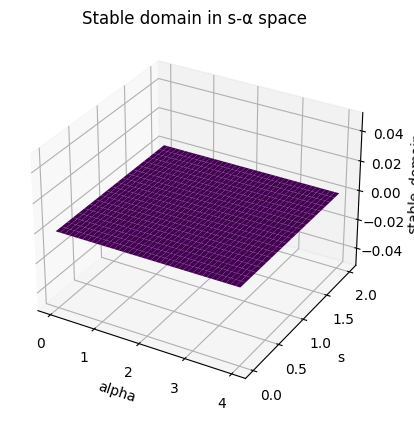

In [5]:
# 绘制3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(AA, SS, np.imag(WW), cmap='viridis')
ax.set_xlabel('alpha')
ax.set_ylabel('s')
ax.set_zlabel('stable_domain')
ax.set_title('Stable domain in s-α space')
plt.savefig('stable_domain.png')